In [1]:
from fuzzy_system import *

%load_ext autoreload
%autoreload 2
%matplotlib widget

# System

In [2]:
spreadParticlesPerCell = LinguisticVariable("spreadParticlesPerCell", (0, 10))
avgParticles = LinguisticVariable("avgParticlesPerCell", (0, 10))

density = LinguisticVariable("density", (0, 30))

spreadParticlesPerCell.addLinguisticTerm(makeGaussian("low", 0, 2))
spreadParticlesPerCell.addLinguisticTerm(makeGaussian("medium", 5, 2))
spreadParticlesPerCell.addLinguisticTerm(makeGaussian("high", 10, 2))

avgParticles.addLinguisticTerm(makeGaussian("low", 0, 2))
avgParticles.addLinguisticTerm(makeGaussian("medium", 5, 2))
avgParticles.addLinguisticTerm(makeGaussian("high", 10, 2))

density.addLinguisticTerm(makeGaussian("low", 0, 10))
density.addLinguisticTerm(makeGaussian("medium", 15, 10))
density.addLinguisticTerm(makeGaussian("high", 30, 10))

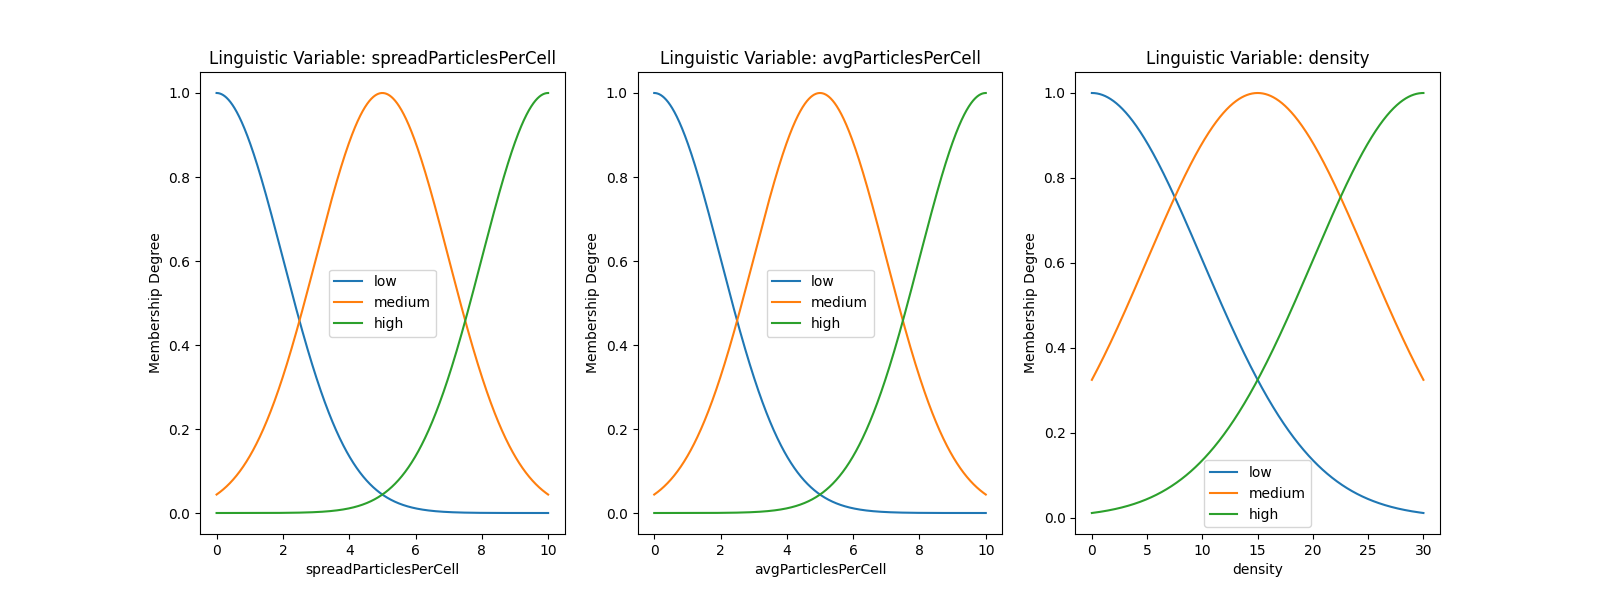

In [3]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(16, 6)

spreadParticlesPerCell.plot(ax[0])
avgParticles.plot(ax[1])
density.plot(ax[2])

plt.show()

In [4]:
fcs = FuzzySystem()


fcs.addRule(FuzzyRule((avgParticles == "low") &
            (spreadParticlesPerCell == "low"), density == "low"))

fcs.addRule(FuzzyRule((avgParticles == "low") &
            (spreadParticlesPerCell == "medium"), density == "medium"))

fcs.addRule(FuzzyRule((avgParticles == "low") &
            (spreadParticlesPerCell == "high"), density == "high"))

plotMapping = {"x": "spreadParticlesPerCell",
               "y": "avgParticlesPerCell", "z": "density"}

In [5]:
# for rule in fcs.rules:
#     fig = rule.plot(plotMapping)
#     (xl, xh) = fig.get_axes()[1].get_xlim()
#     fig.get_axes()[1].set_xlim((xh, xl))
#     (xl, xh) = fig.get_axes()[0].get_xlim()
#     fig.get_axes()[0].set_xlim((xh, xl))

# Create Decision Surface

(10.0, 0.0)

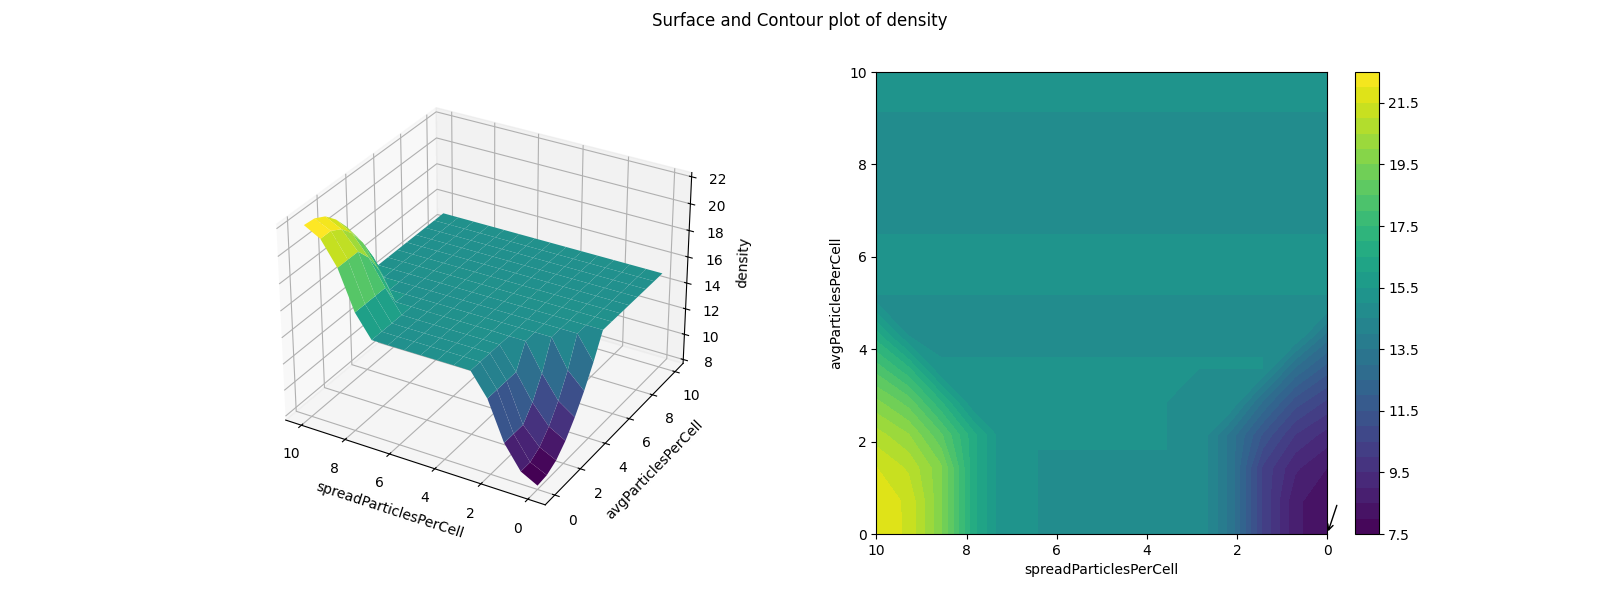

In [6]:
fig = plot3D_surface(fcs.getInputCrispSets(),
                     lambda data: fcs.predict(data), plotMapping, mesh=15)

# invert x axis to fit matlab image
(xl, xh) = fig.get_axes()[1].get_xlim()
fig.get_axes()[1].set_xlim((xh, xl))
(xl, xh) = fig.get_axes()[0].get_xlim()
fig.get_axes()[0].set_xlim((xh, xl))